# import libraries và load data

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
def load_data(url):
  link = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  data = pd.read_csv(link, names=['x', 'y'])
  return data

url_train = 'https://drive.google.com/file/d/1zeaJbYzQUN2esl8fPedRYcBh0Juw4_jm/view?usp=sharing'
url_test = 'https://drive.google.com/file/d/16v06RJAst6ofHijResYJ2xUoeL36Sv2G/view?usp=sharing'

train_data = load_data(url_train)
test_data = load_data(url_test)

# Data

## train data


In [148]:
#xem 5 hàng đầu của dữ liệu
train_data.head()

,x,y
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [149]:
train_data.describe()

,x,y
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


In [150]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71115 entries, 0 to 71114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       71115 non-null  int64  
 1   y       71115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


## test data

In [151]:
test_data.head()

,x,y
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [152]:
test_data.describe()

,x,y
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


In [153]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10590 non-null  int64  
 1   y       10590 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 165.6 KB


## Nhận xét
* Dữ liệu trong cả hai tập train và test không có giá trị null
* Tỉ lệ tập test và train xấp xỉ 1/7
* khoảng giá trị của tập train và test khác nhau

In [154]:
x_train = train_data['x'].to_numpy().reshape(-1, 1)
y_train = train_data['y']
x_test = test_data['x'].to_numpy().reshape(-1, 1)
y_test = test_data['y']

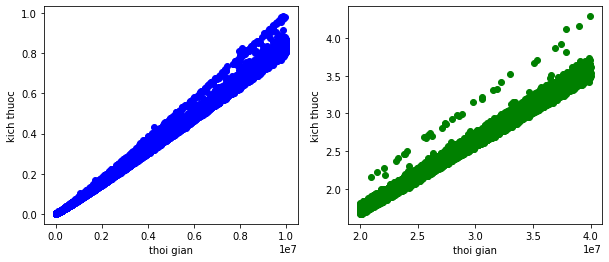

In [155]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x_train, y_train, 'ob')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.subplot(122)
plt.plot(x_test, y_test, 'og')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.show()

* Dữ liệu phần bố có vẻ tuyến tính trên cả tập train và test

# Model - liear regression


## Model khi chưa thêm feature

In [156]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)
print('Mean squared error for train_data: ', MSE_train)
print('MSE_train/mean_train: ', np.sqrt(MSE_train)/np.mean(y_train)*100)

print('Mean squared error for test_data: ', MSE_test)
print('MSE_test/mean_test: ', np.sqrt(MSE_test)/np.mean(y_test)*100)

Mean squared error for train_data:  0.00014337728721748835
MSE_train/mean_train:  2.9435753348039553
Mean squared error for test_data:  0.020664949397549082
MSE_test/mean_test:  5.439398887356979


* độ sai lệch dự đoán là 5,4%, một con số khá tốt đối với linear regression
* Khi kích thước input lớn hơn thì độ sai lệch lớn hơn(5,4 > 2,9)



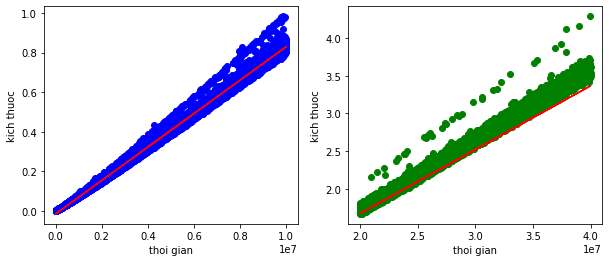

In [158]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x_train, y_train, 'ob')
plt.plot(x_train, y_train_pred, 'r')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.subplot(122)
plt.plot(x_test, y_test, 'og')
plt.plot(x_test, y_test_pred, 'r')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.show()

## Model thêm feature

* Thời gian chạy của chương trình phụ thuộc vào độ phức tập của thuật toán, vì vậy thời gian chạy không tỉ lệ tuyến tính với input đầu vào
* Độ phức tap thuật toán chia thành nhiều nhóm, vì vậy ta thêm một số feature *x^2, log(x), xlog(x)*

In [159]:
#hàm thêm feature
def preprocess_data(data):
  y = data['y']
  data.drop(columns = ['y'], inplace = True)
  data['x^2'] = data['x'].apply(lambda x: x**2)
  data['log(x)'] = data['x'].apply(lambda x: np.log(x))
  data['xlog(x)'] = data['x'].apply(lambda x: x*np.log(x))
  return (data, y)

In [160]:
x_train, y_train = preprocess_data(train_data)
x_test, y_test = preprocess_data(test_data)

In [161]:
#tạo model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
#dự doán và đánh giá model
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)
print('Mean squared error for train_data: ', MSE_train)
print('MSE_train/mean_train: ', np.sqrt(MSE_train)/np.mean(y_train)*100)

print('Mean squared error for test_data: ', MSE_test)
print('MSE_test/mean_test: ', np.sqrt(MSE_test)/np.mean(y_test)*100)

Mean squared error for train_data:  0.00012190225045315814
MSE_train/mean_train:  2.7141936949019714
Mean squared error for test_data:  0.004181195754199342
MSE_test/mean_test:  2.4467183851971535


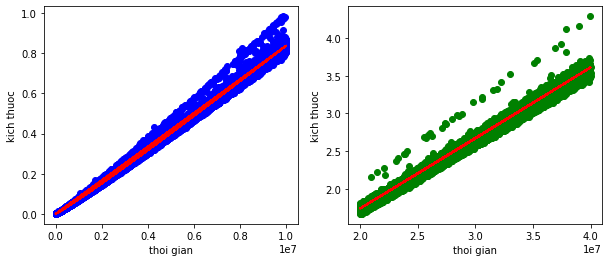

In [163]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x_train['x'], y_train, 'ob')
plt.plot(x_train['x'], y_train_pred, 'r')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.subplot(122)
plt.plot(x_test['x'], y_test, 'og')
plt.plot(x_test['x'], y_test_pred, 'r')
plt.xlabel('thoi gian')
plt.ylabel('kich thuoc')
plt.show()

* vì sau khi thêm 3 feature x^2, log(x), xlog(x) thì mean square error đều giảm ở cả tập train và tập test đặc biệt MSE của tập test giảm đáng kể(5,4% -> 2,4%)
* Model đã fit hơn với data